In [173]:
# Load CSV (using python)
import csv
import numpy as np
import seaborn as sns
import pandas as pd
filename = pd.read_csv("D:\HaseeB LibrarY\Internship\Project 1 Dataset\Test.csv")

filename.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [2]:
#checking duplicates
dup=filename.duplicated()
print(dup.sum())
filename[dup]

0


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


In [3]:
#checking info

filename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [4]:
#checking shape

filename.shape

(5681, 11)

In [5]:

filename.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [6]:
#checking null values

filename.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
#removing nulls using medium and mode techniques

median1=filename['Item_Weight'].median()

filename['Item_Weight'].replace(np.nan,median1,inplace=True)

mode1=filename['Outlet_Size'].mode().values[0]

filename['Outlet_Size']=filename['Outlet_Size'].replace(np.nan,mode1)


In [8]:
filename.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [9]:
filename.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.662023,0.065684,141.023273,1997.828903
std,4.245831,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


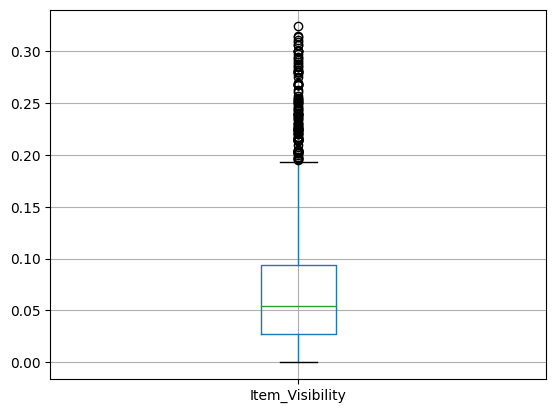

In [10]:
import matplotlib.pyplot as plt
filename.boxplot(column=['Item_Visibility'])
plt.show()

In [11]:
#def remove_outlier

def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    IQR=q3-q1
    lower_range=q1 - (1.5 * IQR)
    upper_range=q3 + (1.5 * IQR)
    return lower_range, upper_range

In [12]:
low,up=remove_outlier(filename['Item_Visibility'])
filename['Item_Visibility']=np.where(filename['Item_Visibility']>up,up,filename['Item_Visibility'])
filename['Item_Visibility']=np.where(filename['Item_Visibility']<low,low,filename['Item_Visibility'])

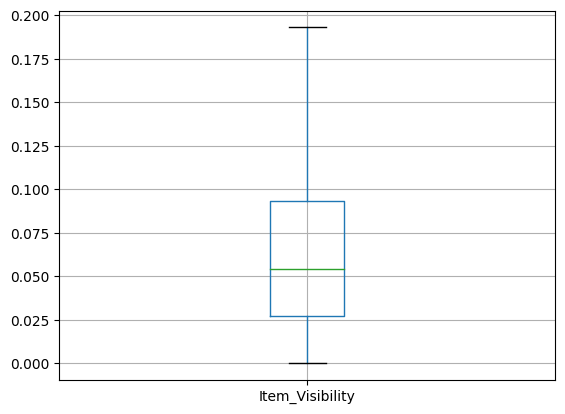

In [13]:
#after removing outliers
filename.boxplot(column=['Item_Visibility'])
plt.show()

In [14]:
train=pd.read_csv("D:\HaseeB LibrarY\Internship\Project 1 Dataset\Train.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [16]:
#checking duplicates
dup=train.duplicated()
print(dup.sum())
train[dup]

0


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [17]:
#checking shape

train.shape

(8523, 12)

In [18]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
#checking null values

train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [20]:
#removing nulls using medium and mode techniques

median1=train['Item_Weight'].median()

train['Item_Weight'].replace(np.nan,median1,inplace=True)

mode1=train['Outlet_Size'].mode().values[0]

train['Outlet_Size']=train['Outlet_Size'].replace(np.nan,mode1)


In [21]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


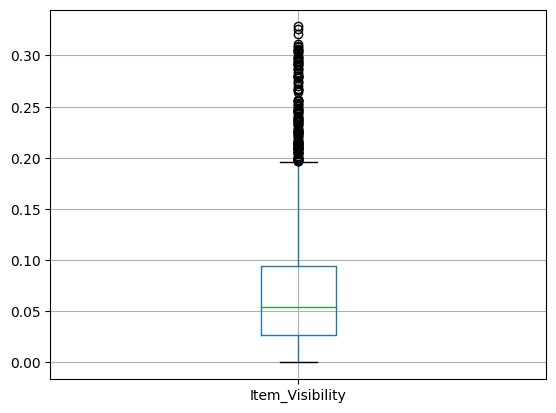

In [23]:
train.boxplot(column=['Item_Visibility'])
plt.show()

In [24]:
low,up=remove_outlier(train['Item_Visibility'])
train['Item_Visibility']=np.where(train['Item_Visibility']>up,up,train['Item_Visibility'])
train['Item_Visibility']=np.where(train['Item_Visibility']<low,low,train['Item_Visibility'])

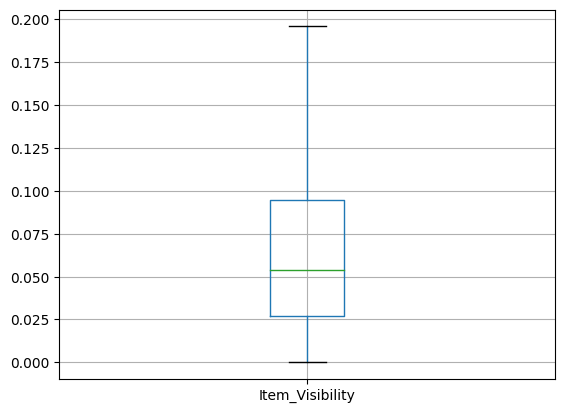

In [25]:
#after removing outliers
train.boxplot(column=['Item_Visibility'])
plt.show()


**EDA**

In [34]:
categorical = train.select_dtypes(include =[object])
print(categorical.shape[1],"Categorical Shape")
categorical.columns

7 Categorical Shape


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

**1. Item_Fat_Content**

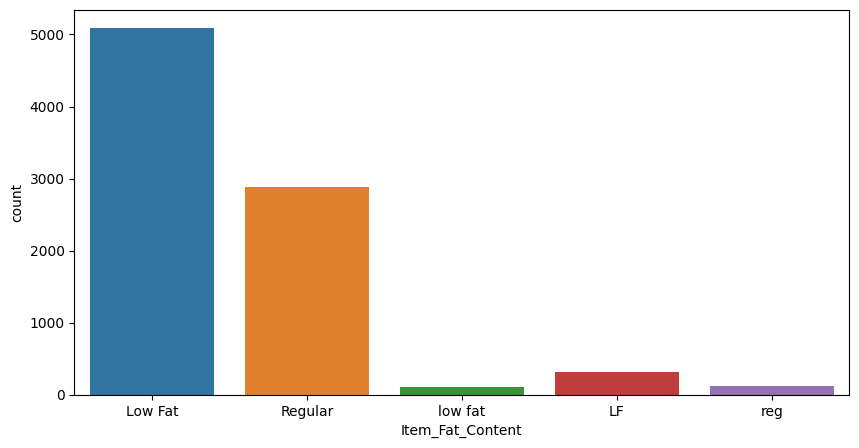

In [58]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='Item_Fat_Content')
plt.show()

**Categorical Analysis**

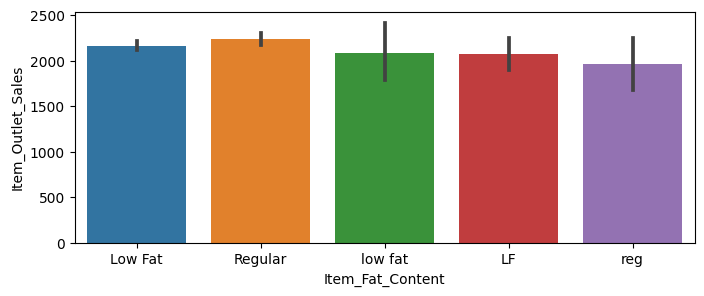

In [64]:
plt.figure(figsize=(8,3))
sns.barplot(data=train, x='Item_Fat_Content', y='Item_Outlet_Sales')
plt.show()

**Observation**
The Item Bought are more of Low fat. However Item Outles sales are almost same for both Low Fat and Regular Item Content.

**2. Item_Type**

<Figure size 2500x1200 with 0 Axes>

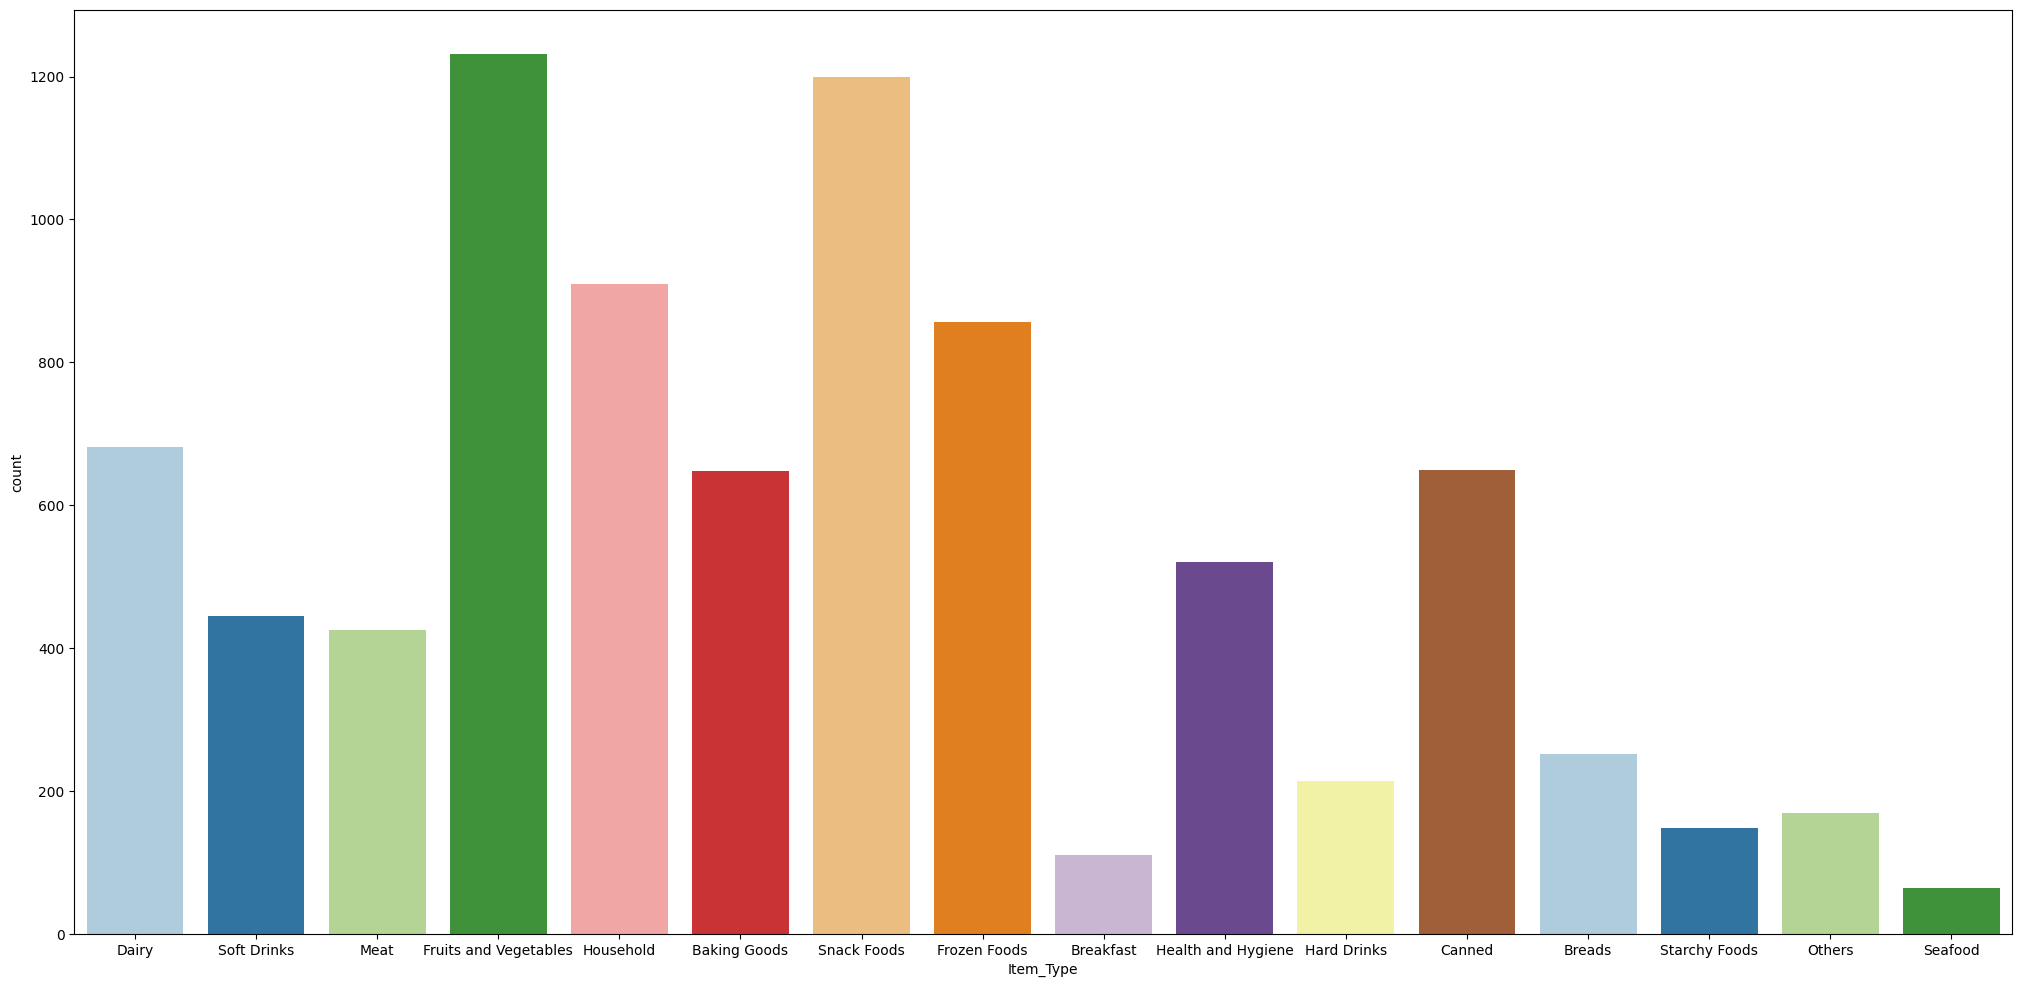

In [70]:
plt.figure(figsize=(25,12))

sns.countplot(data=train, x='Item_Type', palette='Paired', orient="h")

plt.show()

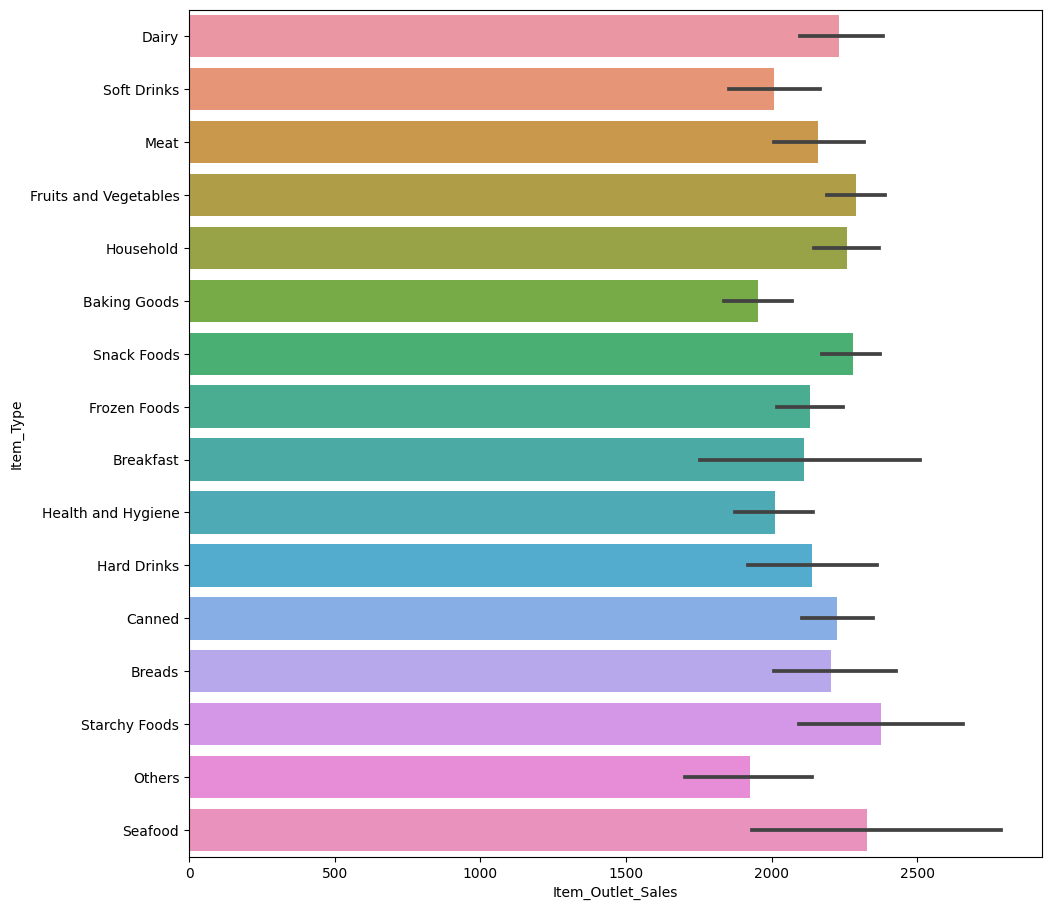

In [75]:
plt.figure(figsize=(11,11))
sns.barplot(data=train, y='Item_Type', x='Item_Outlet_Sales')

plt.show()

**Observation:** The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

**3. Outlet_Size**

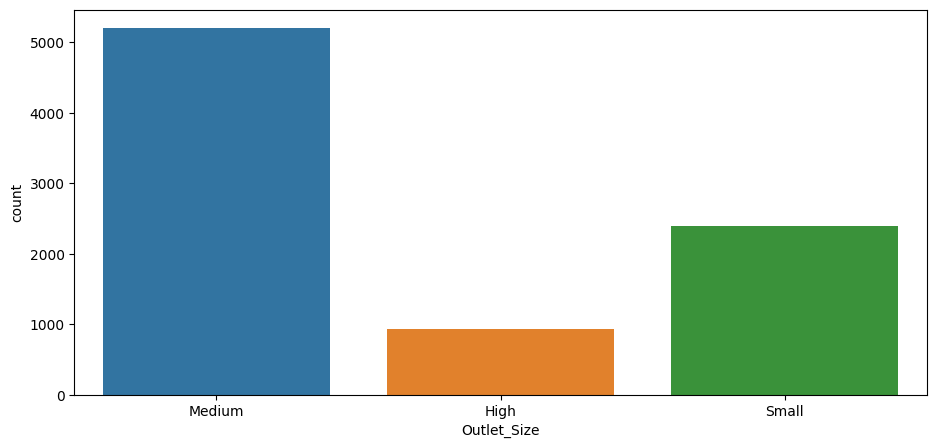

In [79]:
plt.figure(figsize=(11,5))
sns.countplot(data=train, x='Outlet_Size')

plt.show()

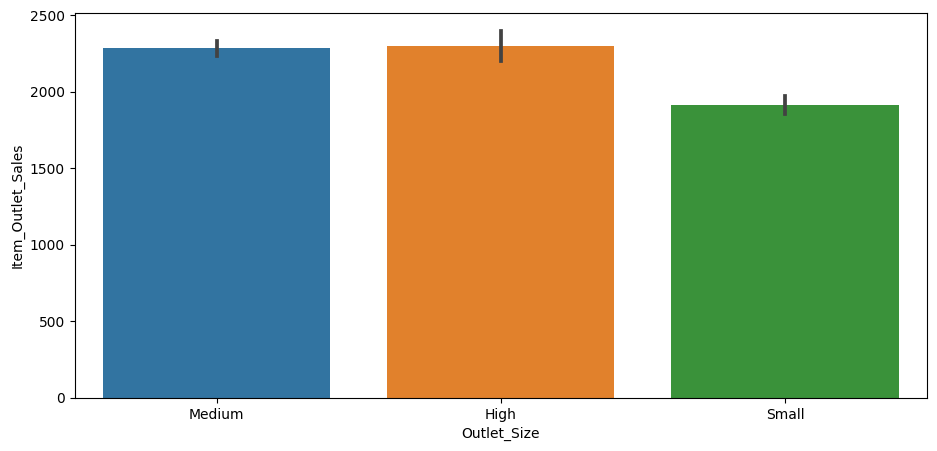

In [82]:
plt.figure(figsize=(11,5))
sns.barplot(data=train, x='Outlet_Size', y='Item_Outlet_Sales')

plt.show()

**Observations:** The Outlets are more of Medium Size

But Outlet Sales is maximum for Medium and High sized Outlets so may be with High size Outlets can improve the Outlet Sales.

**4. Outlet_Location_Type**

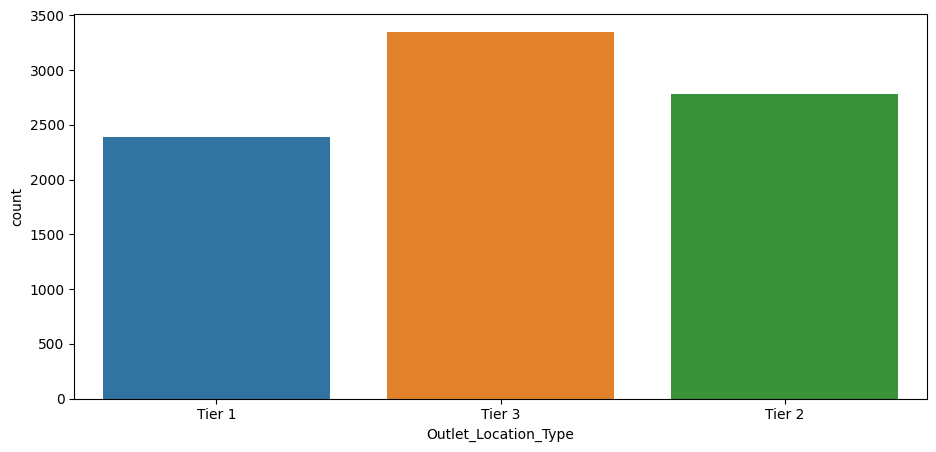

In [83]:
plt.figure(figsize=(11,5))
sns.countplot(data=train, x='Outlet_Location_Type')

plt.show()

<Figure size 1000x500 with 0 Axes>

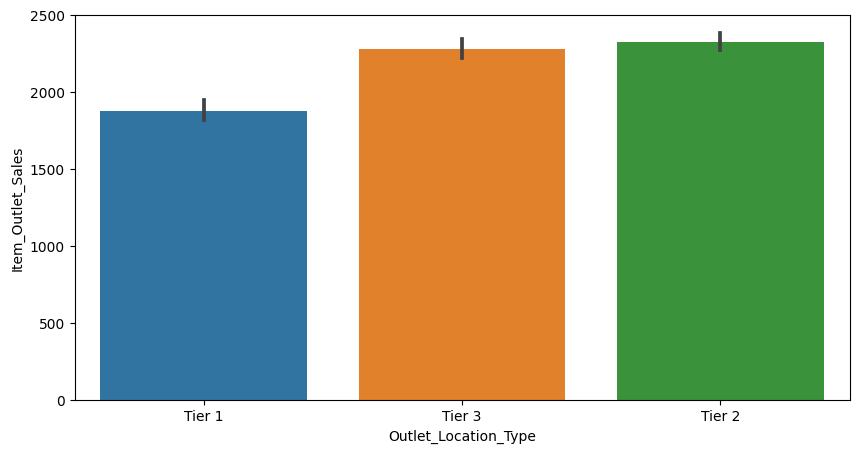

In [85]:
plt.figure(figsize=(10,5))
sns.barplot(data=train, x='Outlet_Location_Type', y='Item_Outlet_Sales')

plt.show()
            

**Observations:** The Outlet Sales tend to be high for Tier3 and Tier 2 location types. However we have only Tier3 locations maximum Outlets

**5. Outlet_Type**


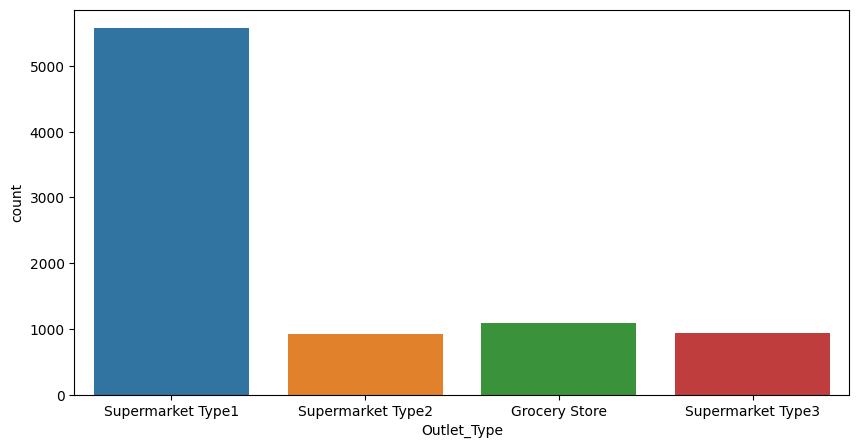

In [86]:
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='Outlet_Type')

plt.show()

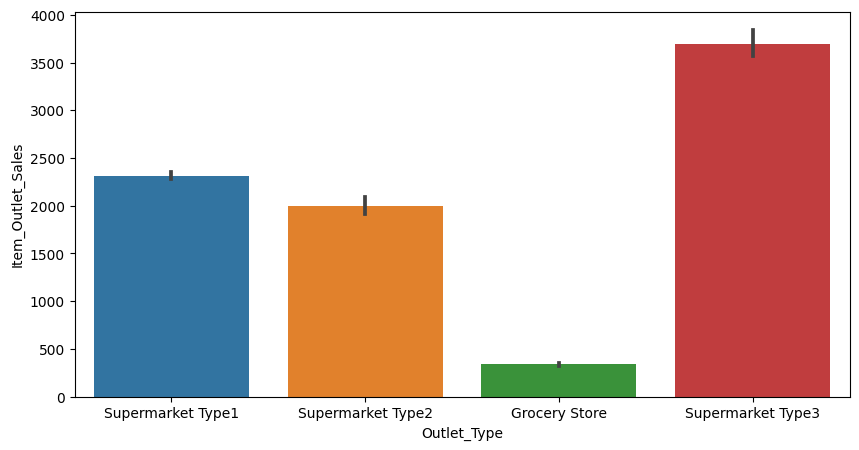

In [87]:
plt.figure(figsize=(10,5))
sns.barplot(data=train, x='Outlet_Type', y='Item_Outlet_Sales')

plt.show()

**Observations:** The Outlets are more of Supermarket Type1.
However sales are more on Type 3

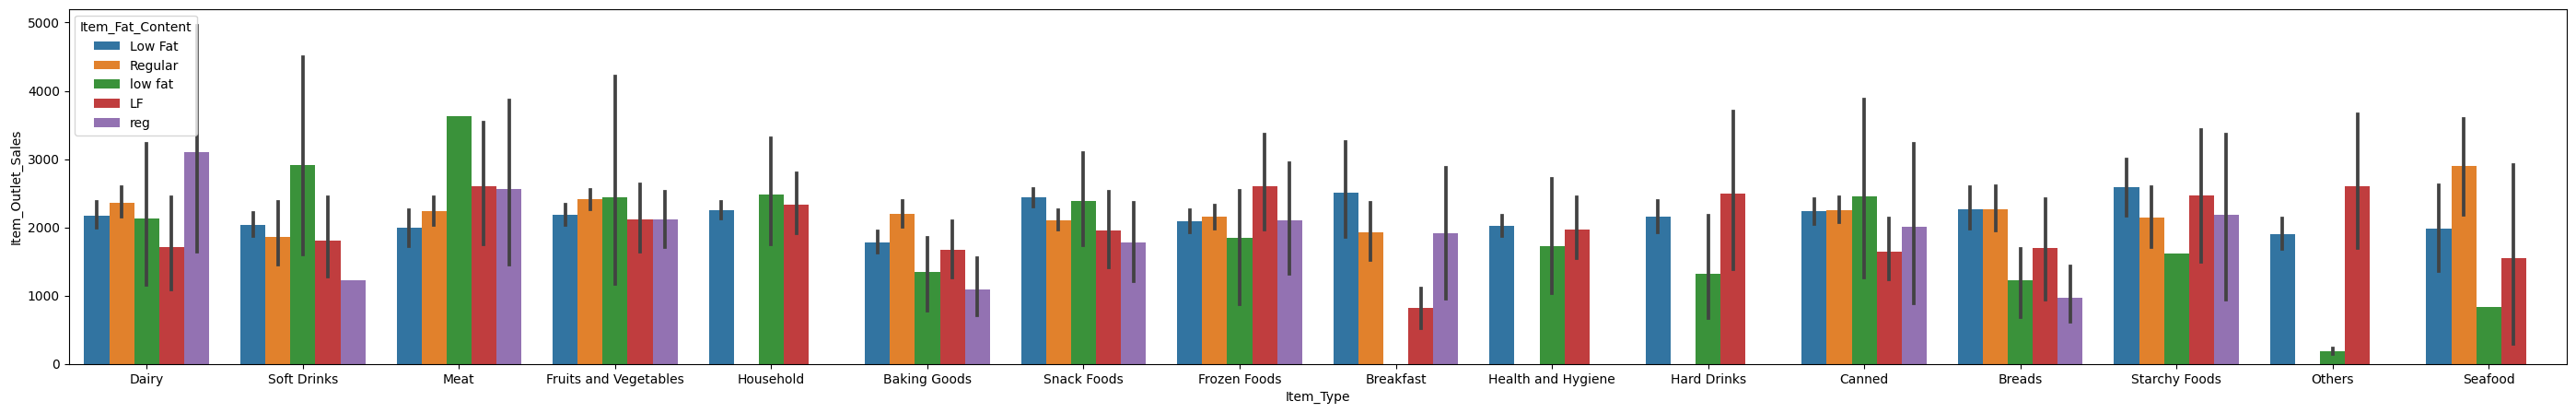

In [90]:
plt.figure(figsize=(35,5))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=train)
plt.show()

<Figure size 1000x500 with 0 Axes>

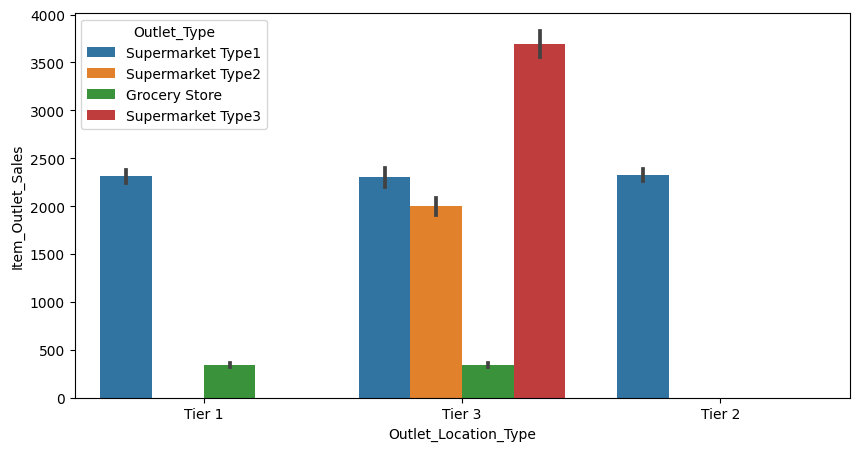

In [97]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Type',data=train)

plt.show()

**Observations:** The Tier-3 location type has all types of Outlet type and has high sales margin

**Analysis on Numerical Features**

In [103]:
# Selecting only numerical columns
num_cols = train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Printing the numerical column names
print("Numerical features: ")
num_cols

Numerical features: 


['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

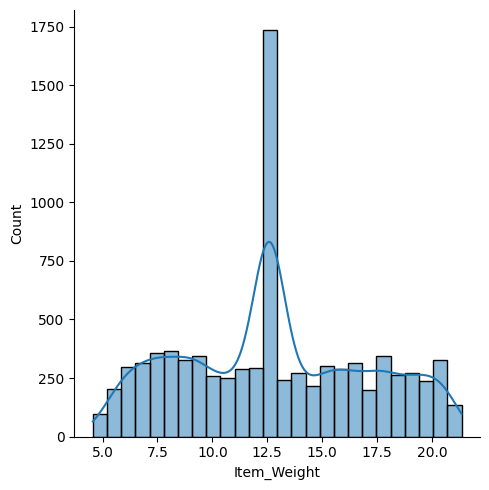

In [106]:
sns.displot(data=train, x=train.Item_Weight, kde=True)
plt.show(1)

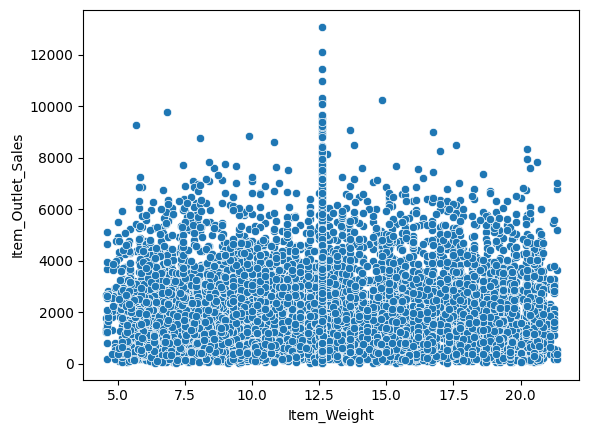

In [111]:
sns.scatterplot(data=train, x='Item_Weight', y='Item_Outlet_Sales')
plt.show(1)

In [119]:
print("Min: ",train.Item_Visibility.min())

print("Mean: ",train['Item_Visibility'].mean())

print("Median: ",train['Item_Visibility'].median())

print("Mode: ",train['Item_Visibility'].mode())


Min:  0.0
Mean:  0.06530699388924087
Median:  0.053930934
Mode:  0    0.0
Name: Item_Visibility, dtype: float64


Lets consider it like missing information and impute it with median (as their are outlier) visibility of that product

In [121]:
train['Item_Visibility']=train['Item_Visibility'].replace(0, train['Item_Visibility'].median())
filename['Item_Visibility']=filename['Item_Visibility'].replace(0, filename['Item_Visibility'].median())


In [122]:
train.Item_Visibility.min()

0.003574698

We can see that now visibility is not exactly zero and it has some value indicating that Item is rarely purchased by the customers

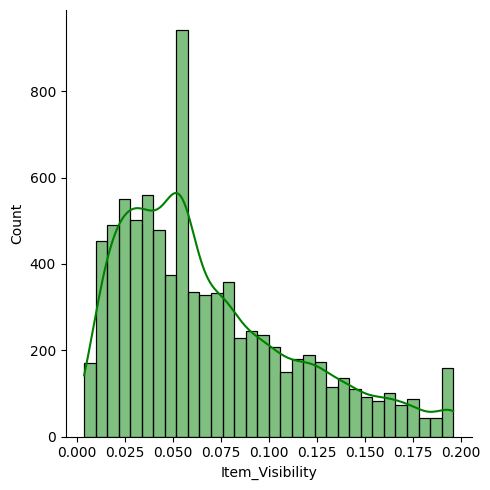

In [128]:
sns.displot(x=train.Item_Visibility, color='green', kde=True)
plt.show()

**Observation:**
We have Items having Visibility 0 to 0.2 is more.
And Items having Visibility around 0.05 is maximum.
Sales is more for Items having Visibility 0 to 0.2
Positive skewness

**3. Item MRP**

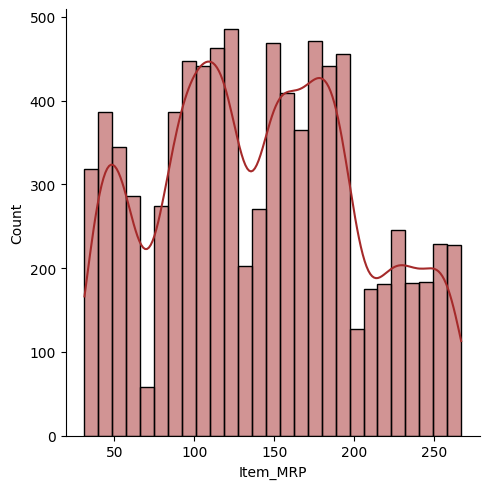

In [129]:
sns.displot(x=train.Item_MRP, color='brown', kde=True)
plt.show()

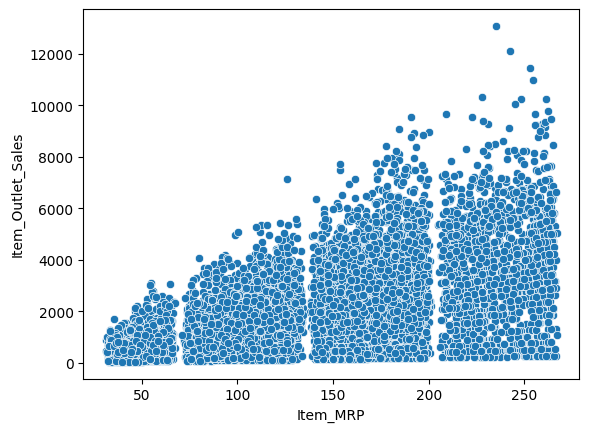

In [130]:
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=train)
plt.show()

**Observations:** We have good amount of products for 50 MRP, 100 MRP ,180 MRP
But MRP ranging from 200-250 dollars is having high Sales.

**4. Outlet_Establishment_Year**

In [133]:
train['Years_Established'] = train['Outlet_Establishment_Year'].apply(lambda x: 2023 - x) 
filename['Years_Established'] = filename['Outlet_Establishment_Year'].apply(lambda x: 2023 - x)


This code creates two new columns in the named train and test called 'Years_Established'. The values in the new columns are calculated by subtracting the 'Outlet_Establishment_Year' column from the year 2023, which gives the number of years that each outlet has been in operation.

<Figure size 800x500 with 0 Axes>

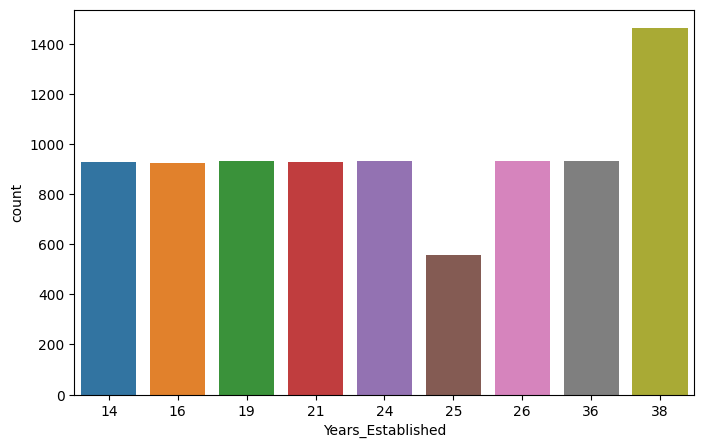

In [136]:
plt.figure(figsize=(8,5))
sns.countplot(x='Years_Established',data=train,palette='tab10')
plt.show()

<Figure size 700x500 with 0 Axes>

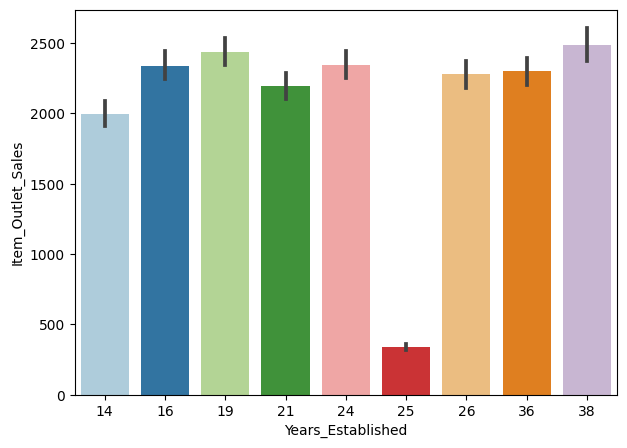

In [141]:
plt.figure(figsize=(7,5))
sns.barplot(x='Years_Established',y='Item_Outlet_Sales',data=train,palette='Paired')
plt.show()

**Observations:**
It is quiet evident that Outlets established 36 years before is having good Sales margin.
We also have a outlet which was established before 23 years has the lowest sales margin, so established years wouldn't improve the Sales unless the products are sold according to customer's interest.

In [142]:
train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,25
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,36


C:\Users\Admin\AppData\Local\Temp\ipykernel_32760\29738443.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr() ,cmap='GnBu', annot=True)


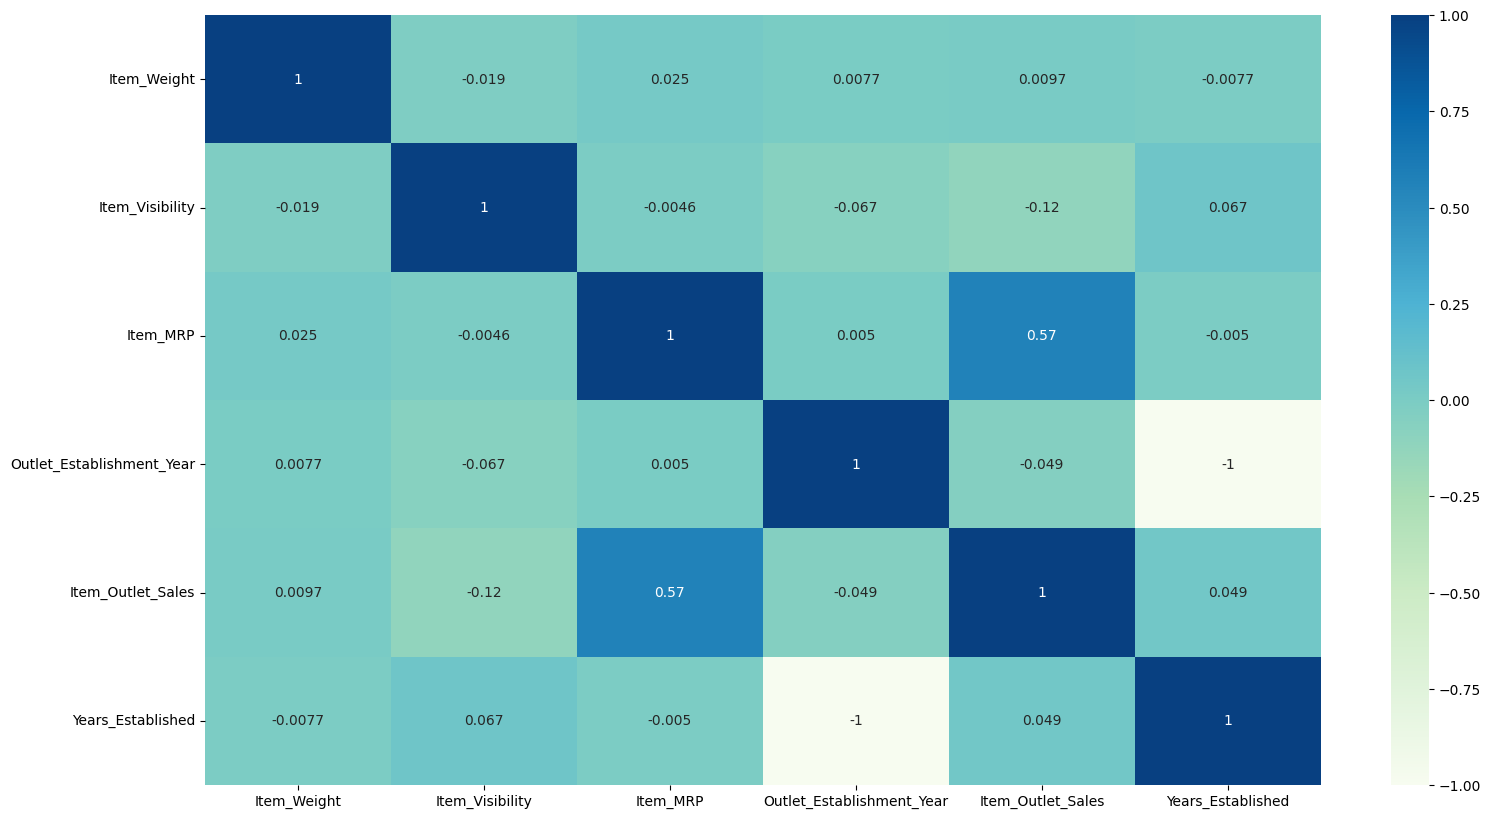

In [143]:
plt.figure(figsize=(18,10))
sns.heatmap(train.corr() ,cmap='GnBu', annot=True)
plt.show()

**Pre-Processing the Dataset**

Remove the skweness

In [144]:
train.Item_Visibility.describe()

count    8523.000000
mean        0.068635
std         0.046034
min         0.003575
25%         0.033085
50%         0.053931
75%         0.094585
max         0.195979
Name: Item_Visibility, dtype: float64

In [145]:
train.Item_Visibility = train.Item_Visibility.apply(np.log1p)


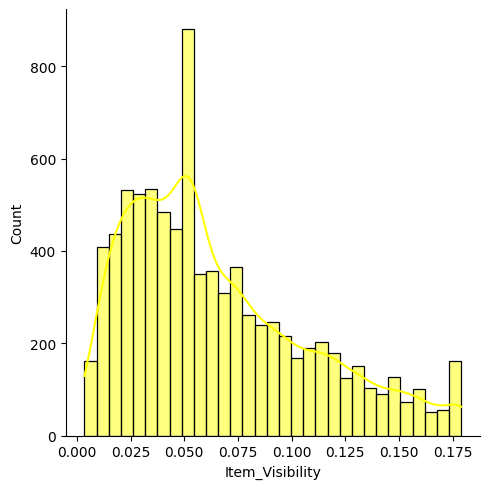

In [147]:
sns.displot(x=train.Item_Visibility, color='yellow', kde=True)
plt.show()

In [148]:
train.Item_Visibility.describe()


count    8523.000000
mean        0.065477
std         0.042305
min         0.003568
25%         0.032550
50%         0.052527
75%         0.090376
max         0.178965
Name: Item_Visibility, dtype: float64

**Feature Engineering**

In [151]:
from sklearn.preprocessing import LabelEncoder

In [154]:
# Create a LabelEncoder object
le = LabelEncoder()

# Encode categorical variables in the training dataset
for i in categorical.columns:
    train[i] = le.fit_transform(train[i])
    
# Encode categorical variables in the testing dataset
for i in categorical.columns:
    filename[i] = le.fit_transform(filename[i])

In [155]:
train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,156,9.30,1,0.015920,4,249.8092,9,1999,1,0,1,3735.1380,24
1,8,5.92,2,0.019095,14,48.2692,3,2009,1,2,2,443.4228,14
2,662,17.50,1,0.016621,10,141.6180,9,1999,1,0,1,2097.2700,24
3,1121,19.20,2,0.052527,6,182.0950,0,1998,1,2,0,732.3800,25
4,1297,8.93,1,0.052527,9,53.8614,1,1987,0,2,1,994.7052,36


We can see Item_Outlet_Sales is highly correlated with Item_MRP, i.e. if Item_MRP increases, Item_Outlet_Sales increases.

**Train Test Split**

In [157]:
train.head(1)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,156,9.3,1,0.01592,4,249.8092,9,1999,1,0,1,3735.138,24


In [158]:
X = train.drop('Item_Outlet_Sales', axis=1)
y = train['Item_Outlet_Sales']

X.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,156,9.30,1,0.015920,4,249.8092,9,1999,1,0,1,24
1,8,5.92,2,0.019095,14,48.2692,3,2009,1,2,2,14


In [161]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)


In [163]:
X.shape, y.shape


((8523, 12), (8523,))

In [164]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape


((6818, 12), (1705, 12), (1705,), (6818,))

In [166]:
import statsmodels.api as sm


In [167]:
# Create a linear regression model and fit it to the data
Lr_model = sm.OLS(y_train, X_train)
results = Lr_model.fit()

# Print the regression coefficients and other statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     655.7
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        00:46:21   Log-Likelihood:                -57940.
No. Observations:                6818   AIC:                         1.159e+05
Df Residuals:                    6806   BIC:                         1.160e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Item_Identifier       

In [168]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# create a Lasso model and fit it to the training data
lasso_model = Lasso(alpha=0.1) # set the regularization strength
lasso_model.fit(X_train, y_train)

# make predictions on the test data
y_pred = lasso_model.predict(X_test)

# calculate the mean squared error and R-squared for the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the model coefficients and other statistics
print("Lasso Regression Report\n")
print("Model coefficients:")
print(lasso_model.coef_)
print("\nModel intercept:")
print(lasso_model.intercept_)
print("\nModel performance:")
print("Mean squared error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

Lasso Regression Report

Model coefficients:
[ 1.25481537e-02 -9.44428014e-01  4.12070976e+01 -1.26729918e+03
 -7.25839561e-01  1.56474089e+01  6.12592009e+01 -1.29478834e+01
 -3.59526109e+02 -2.27712071e+02  8.81704807e+02 -1.37362141e+01]

Model intercept:
25547.645769301478

Model performance:
Mean squared error: 1500300.18
R-squared: 0.49


In [169]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# create a Random Forest model and fit it to the training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=100)
rf_model.fit(X_train, y_train)

# make predictions on the test data
y_pred = rf_model.predict(X_test)

# calculate the mean squared error and R-squared for the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the model feature importances and other statistics
print("Random Forest Regression Report\n")
print("Feature importances:")
print(rf_model.feature_importances_)
print("\nModel performance:")
print("Mean squared error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

Random Forest Regression Report

Feature importances:
[0.06616096 0.04284582 0.01363408 0.08829618 0.0321237  0.43432079
 0.01538352 0.02342755 0.00738551 0.00578801 0.22674605 0.04388785]

Model performance:
Mean squared error: 1331132.14
R-squared: 0.55


In [171]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and fit the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=100)
xgb_model.fit(X_train, y_train)

# Predict on the test set and calculate metrics
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the report
print("XGBoost Regression Report\n")
print(f"Mean squared error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

XGBoost Regression Report

Mean squared error: 1435015.84
R-squared: 0.51


In [172]:
import pickle

# save the trained model in a file
with open('xgb_models.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)
